In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os
import seaborn as sns

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Loading the data 

In [5]:
df= pd.read_csv("C:/Users/Paa Kwasi/Downloads/ift.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,75.275965,16.492740,3.735990,6.741936,0.739823,0.590028,0.653853,40.711513
std,39.820374,13.050292,14.502853,18.480021,1.263320,1.278646,0.296067,11.978374
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.182500,0.000000,0.000000,0.000000,0.000000,0.388625,31.150000
50%,70.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.731555,38.175000
75%,100.000000,20.965000,0.000000,0.000000,0.980000,0.045000,0.906625,48.645000
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


# Checking the correlation between the data 

<AxesSubplot:>

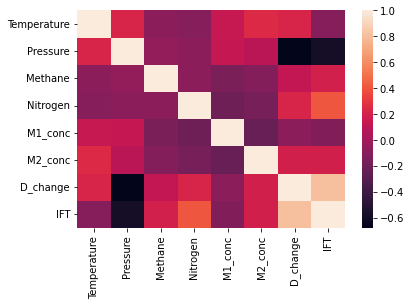

In [6]:
sns.heatmap(df.corr())

# Splitting to train test split 

In [7]:
X= df. drop(['IFT'],axis=1)

In [8]:
y=df.IFT.astype(float)

In [9]:
df.columns

Index(['Temperature', 'Pressure', 'Methane', 'Nitrogen', 'M1_conc', 'M2_conc',
       'Salttype', 'D_change', 'Phase', 'IFT'],
      dtype='object')

In [10]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype','Phase']
X_categorical=One_hot.fit_transform(X[categorical])

In [11]:
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
x_cat

,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water,Phase_GAS,Phase_LIQUID,Phase_SC
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1601,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1602,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1603,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1604,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
X.index=x_cat.index

In [14]:
X=pd.concat([X,x_cat],axis=1)

In [15]:
X

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,Salttype,D_change,Phase,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water,Phase_GAS,Phase_LIQUID,Phase_SC
0,27.00,5.07,0.0,0.0,0.00,0.045,CaCl,0.8817,GAS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,27.00,6.03,0.0,0.0,0.00,0.045,CaCl,0.8299,GAS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,27.00,7.02,0.0,0.0,0.00,0.045,CaCl,0.3028,GAS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,27.00,8.27,0.0,0.0,0.00,0.045,CaCl,0.2546,LIQUID,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27.00,11.05,0.0,0.0,0.00,0.045,CaCl,0.1977,LIQUID,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,150.15,5.65,0.0,0.0,1.98,0.000,NaCl,0.9181,LIQUID,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1602,150.15,12.17,0.0,0.0,1.98,0.000,NaCl,0.8159,SC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1603,150.15,21.88,0.0,0.0,1.98,0.000,NaCl,0.6425,SC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1604,150.15,44.35,0.0,0.0,1.98,0.000,NaCl,0.3695,SC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
X=X.drop(["Salttype","Phase"],axis=1)

In [17]:
y.index=X.index

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
xgbr=XGBRegressor()

In [21]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
xgbr.score(X_train,y_train)

0.9995323013902849

In [23]:
xgbr.score(X_test,y_test)

0.985743855404057

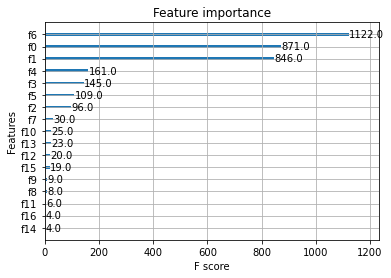

In [24]:
import xgboost as xgb
xgb.plot_importance(xgbr)
plt.show()

In [25]:
importances = xgbr.get_booster().get_score(importance_type='weight')

In [26]:
importances

{'f0': 871.0,
 'f1': 846.0,
 'f2': 96.0,
 'f3': 145.0,
 'f4': 161.0,
 'f5': 109.0,
 'f6': 1122.0,
 'f7': 30.0,
 'f8': 8.0,
 'f9': 9.0,
 'f10': 25.0,
 'f11': 6.0,
 'f12': 20.0,
 'f13': 23.0,
 'f14': 4.0,
 'f15': 19.0,
 'f16': 4.0}

# Checking the Mean squared and absolute errors of the XGBR 

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs=mean_absolute_error(y_test,xgbr.predict(X_test))
mean_squared=mean_squared_error(y_test,xgbr.predict(X_test))

In [28]:
mean_abs, mean_squared

(1.0362184343298442, 2.0805056026948816)

In [29]:
df=pd.DataFrame(y_test) 
df

,IFT
941,39.80
1263,56.35
156,50.25
383,27.88
1316,67.55
...,...
35,38.56
621,20.90
1277,43.74
916,37.40


In [30]:
d2=pd.DataFrame(xgbr.predict(X_test), columns=['IFT_pred'])
d2.index=df.index

In [31]:
df=pd.concat([df,d2],axis=1)

In [32]:
df.to_csv("XGBRegressor actual values vs Predicted values.csv")

# Neural network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [59]:
model=Sequential([
    Dense(50, 'relu'),
    Dense(100,'relu',kernel_regularizer=l2(0.01)),
    Dense(200,'relu', kernel_regularizer=l2(0.01)),
    Dense(300,'relu', kernel_regularizer=l2(0.01)),
    Dense(400,'relu'),
    Dense(1,'linear')
])

model.compile(optimizer=Adam(0.01),loss='mse', metrics=['mse','mean_absolute_error'])

In [60]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<1.9:
            self.model.stop_training=True

In [61]:
history=model.fit(X_train,y_train,epochs=2000, callbacks=Mycallback())

Epoch 1/2000
36/36 [==============================] - 1s 4ms/step - loss: 248.0461 - mse: 244.3842 - mean_absolute_error: 10.5716
Epoch 2/2000
36/36 [==============================] - 0s 4ms/step - loss: 29.3211 - mse: 26.2766 - mean_absolute_error: 3.8781
Epoch 3/2000
36/36 [==============================] - 0s 4ms/step - loss: 25.2871 - mse: 22.6160 - mean_absolute_error: 3.5274
Epoch 4/2000
36/36 [==============================] - 0s 4ms/step - loss: 28.3986 - mse: 25.9616 - mean_absolute_error: 3.8165
Epoch 5/2000
36/36 [==============================] - 0s 4ms/step - loss: 22.5252 - mse: 20.2458 - mean_absolute_error: 3.2716
Epoch 6/2000
36/36 [==============================] - 0s 4ms/step - loss: 20.0252 - mse: 17.8497 - mean_absolute_error: 3.0897
Epoch 7/2000
36/36 [==============================] - 0s 4ms/step - loss: 22.7363 - mse: 20.6579 - mean_absolute_error: 3.3865
Epoch 8/2000
36/36 [==============================] - 0s 4ms/step - loss: 23.1935 - mse: 21.1928 - mean_abso

36/36 [==============================] - 0s 4ms/step - loss: 7.8217 - mse: 7.1566 - mean_absolute_error: 1.9995
Epoch 66/2000
36/36 [==============================] - 0s 4ms/step - loss: 7.2353 - mse: 6.5772 - mean_absolute_error: 1.7819
Epoch 67/2000
36/36 [==============================] - 0s 4ms/step - loss: 8.2586 - mse: 7.6097 - mean_absolute_error: 2.0433
Epoch 68/2000
36/36 [==============================] - 0s 3ms/step - loss: 6.2158 - mse: 5.5680 - mean_absolute_error: 1.7323
Epoch 69/2000
36/36 [==============================] - 0s 4ms/step - loss: 6.2859 - mse: 5.6394 - mean_absolute_error: 1.6328
Epoch 70/2000
36/36 [==============================] - 0s 3ms/step - loss: 4.7315 - mse: 4.1001 - mean_absolute_error: 1.4967
Epoch 71/2000
36/36 [==============================] - 0s 4ms/step - loss: 5.2379 - mse: 4.6093 - mean_absolute_error: 1.5767
Epoch 72/2000
36/36 [==============================] - 0s 3ms/step - loss: 5.2039 - mse: 4.5816 - mean_absolute_error: 1.5390
Epoch 

36/36 [==============================] - 0s 3ms/step - loss: 4.1400 - mse: 3.6960 - mean_absolute_error: 1.3928
Epoch 130/2000
36/36 [==============================] - 0s 4ms/step - loss: 4.1247 - mse: 3.6786 - mean_absolute_error: 1.3967
Epoch 131/2000
36/36 [==============================] - 0s 4ms/step - loss: 3.4595 - mse: 3.0120 - mean_absolute_error: 1.2242
Epoch 132/2000
36/36 [==============================] - 0s 4ms/step - loss: 6.7012 - mse: 6.2683 - mean_absolute_error: 1.7966
Epoch 133/2000
36/36 [==============================] - 0s 3ms/step - loss: 7.2494 - mse: 6.8169 - mean_absolute_error: 1.8574
Epoch 134/2000
36/36 [==============================] - 0s 3ms/step - loss: 6.5118 - mse: 6.0839 - mean_absolute_error: 1.8113
Epoch 135/2000
36/36 [==============================] - 0s 3ms/step - loss: 6.6108 - mse: 6.1849 - mean_absolute_error: 1.8708
Epoch 136/2000
36/36 [==============================] - 0s 3ms/step - loss: 4.1504 - mse: 3.7091 - mean_absolute_error: 1.3754

36/36 [==============================] - 0s 4ms/step - loss: 6.9570 - mse: 6.5880 - mean_absolute_error: 1.8718
Epoch 194/2000
36/36 [==============================] - 0s 4ms/step - loss: 3.9945 - mse: 3.6211 - mean_absolute_error: 1.3504
Epoch 195/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.4113 - mse: 3.0393 - mean_absolute_error: 1.2177
Epoch 196/2000
36/36 [==============================] - 0s 5ms/step - loss: 4.3671 - mse: 3.9979 - mean_absolute_error: 1.4613
Epoch 197/2000
36/36 [==============================] - 0s 4ms/step - loss: 3.6660 - mse: 3.3066 - mean_absolute_error: 1.2791
Epoch 198/2000
36/36 [==============================] - 0s 3ms/step - loss: 3.6109 - mse: 3.2474 - mean_absolute_error: 1.2785
Epoch 199/2000
36/36 [==============================] - 0s 3ms/step - loss: 3.8756 - mse: 3.5136 - mean_absolute_error: 1.3527
Epoch 200/2000
36/36 [==============================] - 0s 3ms/step - loss: 3.9156 - mse: 3.5592 - mean_absolute_error: 1.2945

36/36 [==============================] - 0s 5ms/step - loss: 2.8576 - mse: 2.5052 - mean_absolute_error: 1.1119
Epoch 258/2000
36/36 [==============================] - 0s 4ms/step - loss: 3.2093 - mse: 2.8570 - mean_absolute_error: 1.2225
Epoch 259/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.8339 - mse: 2.4843 - mean_absolute_error: 1.1389
Epoch 260/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.7703 - mse: 2.4250 - mean_absolute_error: 1.1174
Epoch 261/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.2430 - mse: 2.8968 - mean_absolute_error: 1.2411
Epoch 262/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.0066 - mse: 2.6682 - mean_absolute_error: 1.1461
Epoch 263/2000
36/36 [==============================] - 0s 5ms/step - loss: 4.7524 - mse: 4.4143 - mean_absolute_error: 1.5341
Epoch 264/2000
36/36 [==============================] - 0s 4ms/step - loss: 3.1254 - mse: 2.7861 - mean_absolute_error: 1.1911

36/36 [==============================] - 0s 5ms/step - loss: 6.1804 - mse: 5.8540 - mean_absolute_error: 1.7712
Epoch 322/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.7341 - mse: 3.4012 - mean_absolute_error: 1.3019
Epoch 323/2000
36/36 [==============================] - 0s 6ms/step - loss: 4.3666 - mse: 4.0382 - mean_absolute_error: 1.3623
Epoch 324/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.7665 - mse: 2.4422 - mean_absolute_error: 1.0934
Epoch 325/2000
36/36 [==============================] - 0s 5ms/step - loss: 4.8361 - mse: 4.5107 - mean_absolute_error: 1.5314
Epoch 326/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.4954 - mse: 3.1700 - mean_absolute_error: 1.3011
Epoch 327/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.0630 - mse: 2.7357 - mean_absolute_error: 1.1823
Epoch 328/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.5680 - mse: 2.2425 - mean_absolute_error: 1.0596

36/36 [==============================] - 0s 5ms/step - loss: 2.5535 - mse: 2.2447 - mean_absolute_error: 1.0831
Epoch 386/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.3501 - mse: 2.0413 - mean_absolute_error: 1.0017
Epoch 387/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.8015 - mse: 2.4948 - mean_absolute_error: 1.1589
Epoch 388/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.2998 - mse: 2.9955 - mean_absolute_error: 1.2381
Epoch 389/2000
36/36 [==============================] - 0s 5ms/step - loss: 4.9155 - mse: 4.6054 - mean_absolute_error: 1.5332
Epoch 390/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.3593 - mse: 2.0504 - mean_absolute_error: 1.0130
Epoch 391/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.3622 - mse: 2.0546 - mean_absolute_error: 1.0110
Epoch 392/2000
36/36 [==============================] - 0s 8ms/step - loss: 2.3798 - mse: 2.0730 - mean_absolute_error: 1.0278

36/36 [==============================] - 0s 5ms/step - loss: 2.3156 - mse: 2.0183 - mean_absolute_error: 1.0189
Epoch 450/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.1527 - mse: 1.8561 - mean_absolute_error: 0.9540
Epoch 451/2000
36/36 [==============================] - 0s 6ms/step - loss: 2.1258 - mse: 1.8328 - mean_absolute_error: 0.9351
Epoch 452/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.7159 - mse: 2.4218 - mean_absolute_error: 1.1111
Epoch 453/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.4993 - mse: 2.2053 - mean_absolute_error: 1.0297
Epoch 454/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.6356 - mse: 2.3426 - mean_absolute_error: 1.1001
Epoch 455/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.1654 - mse: 1.8744 - mean_absolute_error: 0.9628
Epoch 456/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.1672 - mse: 1.8748 - mean_absolute_error: 0.9767

36/36 [==============================] - 0s 5ms/step - loss: 3.0184 - mse: 2.7197 - mean_absolute_error: 1.1698
Epoch 514/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.0954 - mse: 1.7959 - mean_absolute_error: 0.9475
Epoch 515/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.7489 - mse: 2.4537 - mean_absolute_error: 1.1162
Epoch 516/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.1894 - mse: 1.8952 - mean_absolute_error: 0.9507
Epoch 517/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.1350 - mse: 1.8413 - mean_absolute_error: 0.9306
Epoch 518/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.8782 - mse: 2.5851 - mean_absolute_error: 1.1846
Epoch 519/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.8930 - mse: 2.6016 - mean_absolute_error: 1.1498
Epoch 520/2000
36/36 [==============================] - 0s 6ms/step - loss: 2.4700 - mse: 2.1814 - mean_absolute_error: 1.0396

36/36 [==============================] - 0s 4ms/step - loss: 3.3033 - mse: 3.0135 - mean_absolute_error: 1.2521
Epoch 578/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.2956 - mse: 2.0083 - mean_absolute_error: 0.9963
Epoch 579/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.2396 - mse: 1.9535 - mean_absolute_error: 0.9563
Epoch 580/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.7176 - mse: 2.4325 - mean_absolute_error: 1.1294
Epoch 581/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.2807 - mse: 1.9874 - mean_absolute_error: 0.9747
Epoch 582/2000
36/36 [==============================] - 0s 4ms/step - loss: 2.3744 - mse: 2.0832 - mean_absolute_error: 1.0236
Epoch 583/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.2587 - mse: 1.9722 - mean_absolute_error: 0.9794
Epoch 584/2000
36/36 [==============================] - 0s 5ms/step - loss: 3.3790 - mse: 3.0951 - mean_absolute_error: 1.2327

36/36 [==============================] - 0s 6ms/step - loss: 2.1299 - mse: 1.8522 - mean_absolute_error: 0.9498
Epoch 642/2000
36/36 [==============================] - 0s 8ms/step - loss: 2.2693 - mse: 1.9932 - mean_absolute_error: 0.9869
Epoch 643/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.2881 - mse: 2.0104 - mean_absolute_error: 1.0094
Epoch 644/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.7832 - mse: 2.5043 - mean_absolute_error: 1.1305
Epoch 645/2000
36/36 [==============================] - 0s 5ms/step - loss: 4.9603 - mse: 4.6787 - mean_absolute_error: 1.5657
Epoch 646/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.9092 - mse: 2.6230 - mean_absolute_error: 1.1622
Epoch 647/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.1238 - mse: 1.8416 - mean_absolute_error: 0.9438
Epoch 648/2000
36/36 [==============================] - 0s 5ms/step - loss: 2.1729 - mse: 1.8928 - mean_absolute_error: 0.9896

# Looking at Losses vs epochs 

In [62]:
pd.DataFrame(history.history)

,loss,mse,mean_absolute_error
0,248.046097,244.384232,10.571640
1,29.321064,26.276554,3.878149
2,25.287123,22.615952,3.527432
3,28.398550,25.961573,3.816538
4,22.525164,20.245850,3.271552
...,...,...,...
659,2.276371,1.995469,1.014519
660,2.370627,2.090195,1.027067
661,2.134960,1.853925,0.939715
662,2.707601,2.425998,1.113265


# Seeing the score 

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

16/16 [==============================] - 0s 2ms/step


0.9828725624300881

In [64]:
r2_score(y_train,model.predict(X_train))

36/36 [==============================] - 0s 2ms/step


0.9903379561381618

In [65]:
model.save("IFT_Model_no_phase.h5")

In [66]:
ann=pd.DataFrame(y_test)
pred=pd.DataFrame(model.predict(X_test),columns=['IFT ANN model'])

16/16 [==============================] - 0s 3ms/step


In [67]:
ann.index=pred.index

In [68]:
ann=pd.concat([ann,pred],axis=1)